In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
N = 1000
Tp = 800
t = np.arange(0,N)
x = np.sin(0.02*t) + 2*np.random.rand(N)
df = pd.DataFrame(x)
df['values'] = df[0]
df = df.drop(columns=0)
df[1:10]

,values
1,0.058957
2,0.548601
3,1.983713
4,1.320417
5,0.298638
6,0.744951
7,1.205621
8,0.768328
9,1.477530


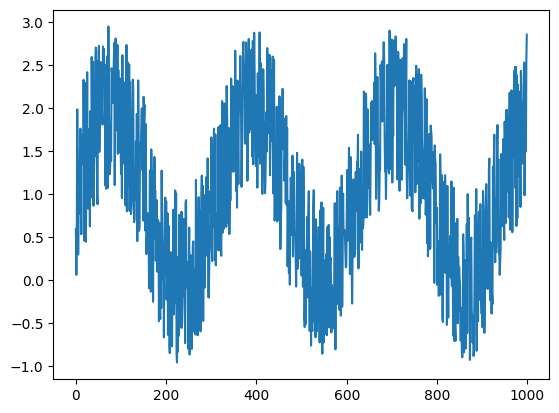

In [ ]:

plt.plot(df)
plt.show()

In [ ]:
values = df.values
train, test = values[0:Tp, :] , values[Tp:N, : ]

In [ ]:
test[1:10]

array([[-0.05732818],
       [ 0.36521607],
       [ 0.44903373],
       [-0.18482193],
       [ 0.21886233],
       [ 0.37848088],
       [ 1.46180445],
       [ 1.18441953],
       [-0.17363786]])

In [ ]:
step  = 4
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
test

array([ 0.67824364, -0.05732818,  0.36521607,  0.44903373, -0.18482193,
        0.21886233,  0.37848088,  1.46180445,  1.18441953, -0.17363786,
        0.89202468,  1.21667597, -0.43349047, -0.48738521,  0.24488942,
        1.13925066,  0.87010029,  0.50449993,  1.21900645,  0.08272919,
        0.80302643,  0.96476304, -0.52287815,  1.09399845, -0.04036545,
       -0.43664543,  0.3240268 ,  0.34729461,  0.05468985,  0.510914  ,
        0.26602201,  0.02522328,  1.14690747, -0.06783985,  0.75277473,
       -0.03539815, -0.64816287,  1.07321951, -0.70730746, -0.47410168,
       -0.52717791, -0.70732223,  0.66278063,  0.34031868, -0.2586147 ,
        0.71140336, -0.50355118,  0.26858128, -0.35727493,  0.15366464,
        0.02438374, -0.02782536, -0.69956956, -0.70392453, -0.32872565,
       -0.79949343, -0.8992432 , -0.79950505,  0.5316674 ,  0.31643435,
       -0.83967227, -0.2739568 ,  0.22932871,  0.06934372, -0.79540303,
       -0.2969699 ,  0.64513951, -0.61782049,  0.99808347,  0.21

In [ ]:
def convertToMatrix(data, step):
  X, Y = [], []
  for i in range(len(data)-step):
    d = i+step
    X.append(data[i:d,])
    Y.append(data[d, ])
  return np.array(X), np.array(Y)

trainX, trainY = convertToMatrix(train, step)
testX, testY = convertToMatrix(test, step)
trainX

array([[0.59014401, 0.05895723, 0.54860067, 1.98371322],
       [0.05895723, 0.54860067, 1.98371322, 1.32041683],
       [0.54860067, 1.98371322, 1.32041683, 0.29863798],
       ...,
       [1.35803461, 0.65916036, 0.84480205, 0.84480205],
       [0.65916036, 0.84480205, 0.84480205, 0.84480205],
       [0.84480205, 0.84480205, 0.84480205, 0.84480205]])

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX

array([[[0.59014401, 0.05895723, 0.54860067, 1.98371322]],

       [[0.05895723, 0.54860067, 1.98371322, 1.32041683]],

       [[0.54860067, 1.98371322, 1.32041683, 0.29863798]],

       ...,

       [[1.35803461, 0.65916036, 0.84480205, 0.84480205]],

       [[0.65916036, 0.84480205, 0.84480205, 0.84480205]],

       [[0.84480205, 0.84480205, 0.84480205, 0.84480205]]])

In [ ]:
# Building a mdoel with SimpleRNN
model  = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation='relu'))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457 (5.69 KB)

 Trainable params: 1,457 (5.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(trainX,trainY,epochs=1000, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict, testPredict), axis=0)

Epoch 1/1000
50/50 - 3s - 65ms/step - loss: 2.8017
Epoch 2/1000
50/50 - 0s - 8ms/step - loss: 0.8996
Epoch 3/1000
50/50 - 0s - 3ms/step - loss: 0.4348
Epoch 4/1000
50/50 - 0s - 3ms/step - loss: 0.4093
Epoch 5/1000
50/50 - 0s - 6ms/step - loss: 0.4057
Epoch 6/1000
50/50 - 0s - 5ms/step - loss: 0.4032
Epoch 7/1000
50/50 - 0s - 4ms/step - loss: 0.3988
Epoch 8/1000
50/50 - 0s - 3ms/step - loss: 0.3974
Epoch 9/1000
50/50 - 0s - 4ms/step - loss: 0.3946
Epoch 10/1000
50/50 - 0s - 6ms/step - loss: 0.3916
Epoch 11/1000
50/50 - 0s - 7ms/step - loss: 0.3904
Epoch 12/1000
50/50 - 0s - 5ms/step - loss: 0.3876
Epoch 13/1000
50/50 - 0s - 6ms/step - loss: 0.3860
Epoch 14/1000
50/50 - 0s - 3ms/step - loss: 0.3894
Epoch 15/1000
50/50 - 0s - 3ms/step - loss: 0.3868
Epoch 16/1000
50/50 - 0s - 3ms/step - loss: 0.3857
Epoch 17/1000
50/50 - 0s - 9ms/step - loss: 0.3830
Epoch 18/1000
50/50 - 1s - 12ms/step - loss: 0.3829
Epoch 19/1000
50/50 - 1s - 13ms/step - loss: 0.3811
Epoch 20/1000
50/50 - 0s - 4ms/step -

In [ ]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE' % (trainScore))

Train Score: 0.28 MSE
